# Overview
<div style="text-align: justify;">
The goal of this project is to determine the aircraft with the least risk of accident for a company seeking
to diversify its portfolio by venturing out into the aviation industry specifically operating airplanes for 
commercial and private enterprises. <br>
I can put forward recommendations to the company based on the analysis to help the company become a key player 
in the aviation industry.

## Business Problem
My company is expanding to new industries to diversify its portfolio. Specifically they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircrafts. I am charged with determing the lowest risk aircraft for the company to begin this endeavour. From the given dataset, I will give deeper insight and analysis that will help in determining what kind of aircraft to purchase. Specifically within the dataset I will focus on the following:
- Make
- Model
- Weather Conditions
- Number of engines
- Engine Type
- Injury severity
- Broad phase of flight
- Total Fatal injuries
- Aircraft category


During analysis it will be important to consider the following:
- How to deal with missing values
- How the data will be skewed once missing values have been handled
- What parameters will be used to determine the safest aircraft to purchase
- What is the most appropriate visualization to use to represent my analysis

If the data in my analysis is handled poorly and skewed due to missing data it could lead to poor business decisions for the company.

## Data Understanding
The data used in this project was sourced from the National Transportation and Safety Board that includes aviation accident data and selected incidents in the United States and international waters. <br>
The data contains individual aircraft accidents in the United States and international waters. Some of the important variables within the dataset are: Aircraft category, make, model, weather conditions, number of engines, engine type, injury severity, broad phase of flight, total injuries





# Invegistating the Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
aviation_data = pd.read_csv('AviationData.csv', encoding='latin1') # use latin1 encoding while loading the dataset

aviation_data.head() # see how the data looks like

C:\Users\jeffr\AppData\Local\Temp\ipykernel_6632\3422413541.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('AviationData.csv', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [9]:
aviation_data.shape # see how many rows and columns are present in our data

(88889, 31)

In [3]:
aviation_data.info() # get a summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Based on the summary above we can see that this is a large dataset. We can see that some columns have missing values that will need to be addressed before proceeding.

In [14]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

The column names have dots in between them. Let's normalize the names for easier reading.

In [19]:
aviation_data.columns = aviation_data.columns.str.replace('.', '_') # replace the dots in the column names with underscores

In [20]:
aviation_data.dtypes

Event_Id                   object
Investigation_Type         object
Accident_Number            object
Event_Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport_Code               object
Airport_Name               object
Injury_Severity            object
Aircraft_damage            object
Aircraft_Category          object
Registration_Number        object
Make                       object
Model                      object
Amateur_Built              object
Number_of_Engines         float64
Engine_Type                object
FAR_Description            object
Schedule                   object
Purpose_of_flight          object
Air_carrier                object
Total_Fatal_Injuries      float64
Total_Serious_Injuries    float64
Total_Minor_Injuries      float64
Total_Uninjured           float64
Weather_Condition          object
Broad_phase_of_flight      object
Report_Status 

The Event_date column has an object datatype instead of a datetime datatype. The rest of the columns have the correct datatype having gone through the values within the columns.

In [21]:
# change the event_date column to a datetime datatype
aviation_data['Event_Date'] = pd.to_datetime(aviation_data['Event_Date'])

In [22]:
aviation_data.dtypes

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport_Code                      object
Airport_Name                      object
Injury_Severity                   object
Aircraft_damage                   object
Aircraft_Category                 object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
FAR_Description                   object
Schedule                          object
Purpose_of_flight                 object
Air_carrier                       object
Total_Fatal_Injuries             float64
Total_Serious_In

# Data Preparation
I will start by retaining the relevant columns that I will be using in my analysis. Missing data will also be handled appropriately. If any new columns are required to be created it will be done in this step.<br>
The aim of this step is to ensure the data used for analysis is clean and accurate.

In [30]:
# create a list of the columns that will be used in analysis
relevant_columns = ['Make', 'Model', 'Total_Fatal_Injuries', 'Weather_Condition', 'Broad_phase_of_flight',
                    'Injury_Severity', 'Number_of_Engines', 'Engine_Type', 'Aircraft_Category', 'Event_Date',
                    'Total_Serious_Injuries', 'Total_Minor_Injuries','Country', 'Location', 'Purpose_of_flight', 'Amateur_Built',
                    'Aircraft_damage']

In [31]:
new_aviation_data = aviation_data[relevant_columns]

new_aviation_data

,Make,Model,Total_Fatal_Injuries,Weather_Condition,Broad_phase_of_flight,Injury_Severity,Number_of_Engines,Engine_Type,Aircraft_Category,Event_Date,Total_Serious_Injuries,Total_Minor_Injuries,Country,Location,Purpose_of_flight,Amateur_Built,Aircraft_damage
0,Stinson,108-3,2.0,UNK,Cruise,Fatal(2),1.0,Reciprocating,NaN,1948-10-24,0.0,0.0,United States,"MOOSE CREEK, ID",Personal,No,Destroyed
1,Piper,PA24-180,4.0,UNK,Unknown,Fatal(4),1.0,Reciprocating,NaN,1962-07-19,0.0,0.0,United States,"BRIDGEPORT, CA",Personal,No,Destroyed
2,Cessna,172M,3.0,IMC,Cruise,Fatal(3),1.0,Reciprocating,NaN,1974-08-30,NaN,NaN,United States,"Saltville, VA",Personal,No,Destroyed
3,Rockwell,112,2.0,IMC,Cruise,Fatal(2),1.0,Reciprocating,NaN,1977-06-19,0.0,0.0,United States,"EUREKA, CA",Personal,No,Destroyed
4,Cessna,501,1.0,VMC,Approach,Fatal(1),NaN,NaN,NaN,1979-08-02,2.0,NaN,United States,"Canton, OH",Personal,No,Destroyed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,PIPER,PA-28-151,0.0,NaN,NaN,Minor,NaN,NaN,NaN,2022-12-26,1.0,0.0,United States,"Annapolis, MD",Personal,No,NaN
88885,BELLANCA,7ECA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-26,0.0,0.0,United States,"Hampton, NH",NaN,No,NaN
88886,AMERICAN CHAMPION AIRCRAFT,8GCBC,0.0,VMC,NaN,Non-Fatal,1.0,NaN,Airplane,2022-12-26,0.0,0.0,United States,"Payson, AZ",Personal,No,Substantial
88887,CESSNA,210N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-26,0.0,0.0,United States,"Morgan, UT",Personal,No,NaN


From first glance, it is evident that the make column has different types of names with some being uppercase and some in lowercase. Let's make it all uppercase for uniformity. See how the value count changes.

In [32]:
new_aviation_data['Make'].value_counts() # these are the counts before it is all changed to uppercase

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [33]:
new_aviation_data['Make'] = new_aviation_data['Make'].str.upper()

new_aviation_data['Make'].value_counts() # the value counts after converting it into uppercase 

C:\Users\jeffr\AppData\Local\Temp\ipykernel_6632\1816014390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_aviation_data['Make'] = new_aviation_data['Make'].str.upper()


Make
CESSNA           27149
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
COHEN                1
KITCHENS             1
LUTES                1
IZATT                1
ROYSE RALPH L        1
Name: count, Length: 7587, dtype: int64

In [34]:
new_aviation_data.head()

,Make,Model,Total_Fatal_Injuries,Weather_Condition,Broad_phase_of_flight,Injury_Severity,Number_of_Engines,Engine_Type,Aircraft_Category,Event_Date,Total_Serious_Injuries,Total_Minor_Injuries,Country,Location,Purpose_of_flight,Amateur_Built,Aircraft_damage
0,STINSON,108-3,2.0,UNK,Cruise,Fatal(2),1.0,Reciprocating,NaN,1948-10-24,0.0,0.0,United States,"MOOSE CREEK, ID",Personal,No,Destroyed
1,PIPER,PA24-180,4.0,UNK,Unknown,Fatal(4),1.0,Reciprocating,NaN,1962-07-19,0.0,0.0,United States,"BRIDGEPORT, CA",Personal,No,Destroyed
2,CESSNA,172M,3.0,IMC,Cruise,Fatal(3),1.0,Reciprocating,NaN,1974-08-30,NaN,NaN,United States,"Saltville, VA",Personal,No,Destroyed
3,ROCKWELL,112,2.0,IMC,Cruise,Fatal(2),1.0,Reciprocating,NaN,1977-06-19,0.0,0.0,United States,"EUREKA, CA",Personal,No,Destroyed
4,CESSNA,501,1.0,VMC,Approach,Fatal(1),NaN,NaN,NaN,1979-08-02,2.0,NaN,United States,"Canton, OH",Personal,No,Destroyed


Let's check the missing values for each column

In [35]:
new_aviation_data.isna().sum() # find the total missing values for each column

Make                         63
Model                        92
Total_Fatal_Injuries      11401
Weather_Condition          4492
Broad_phase_of_flight     27165
Injury_Severity            1000
Number_of_Engines          6084
Engine_Type                7096
Aircraft_Category         56602
Event_Date                    0
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Country                     226
Location                     52
Purpose_of_flight          6192
Amateur_Built               102
Aircraft_damage            3194
dtype: int64

<div style="text-align: justify;">
Certain columns have a large number of missing values while other columns have significantly fewer missing values. For columns with few missing values I have decided to remove those rows completely as I believe the data would not be heavily impacted. However for columns with a large number of missing values I will have to choose what method I will use to deal with the missing values depending on the column itself.

In [36]:
new_aviation_data.loc[new_aviation_data.duplicated()] # select the duplicated rows

,Make,Model,Total_Fatal_Injuries,Weather_Condition,Broad_phase_of_flight,Injury_Severity,Number_of_Engines,Engine_Type,Aircraft_Category,Event_Date,Total_Serious_Injuries,Total_Minor_Injuries,Country,Location,Purpose_of_flight,Amateur_Built,Aircraft_damage
1371,CESSNA,172,0.0,VMC,Cruise,Non-Fatal,1.0,Reciprocating,Airplane,1982-05-28,0.0,0.0,United States,"EVANSVILLE, IN",Personal,No,Substantial
3082,BELL,206B,3.0,VMC,Cruise,Fatal(3),1.0,Turbo Shaft,Helicopter,1982-10-18,0.0,0.0,GULF OF MEXICO,GULF OF MEXICO,Unknown,Yes,Destroyed
4761,SCHEMPP-HIRTH,STANDARD CIRRUS,1.0,VMC,Cruise,Fatal(1),NaN,Unknown,NaN,1983-05-22,0.0,0.0,United States,"BRIDGEPORT, CA",Unknown,No,Substantial
7941,CESSNA,172P,0.0,VMC,Taxi,Non-Fatal,1.0,Reciprocating,NaN,1984-04-13,0.0,0.0,United States,"DELAND, FL",Instructional,No,Substantial
8661,SNOW,AT400,0.0,VMC,Landing,Non-Fatal,1.0,Turbo Prop,NaN,1984-06-18,0.0,0.0,United States,"PORTLAND, AR",Aerial Application,No,Substantial
13532,BELL,206L-1,1.0,VMC,Approach,Fatal(1),1.0,Turbo Shaft,NaN,1985-11-30,4.0,7.0,United States,"SAN PEDRO, CA",Unknown,No,Destroyed
19820,BOEING,737,0.0,VMC,Maneuvering,Incident,2.0,Turbo Fan,NaN,1988-03-10,0.0,0.0,United States,"GREENSBORO, NC",Unknown,No,NaN
21077,DOUGLAS,DC-9-51,0.0,UNK,Taxi,Incident,2.0,Turbo Fan,NaN,1988-08-05,0.0,0.0,United States,"ATLANTA, GA",Unknown,No,Minor
22453,MCDONNELL DOUGLAS,DC-9-82,0.0,IMC,Approach,Incident,2.0,Turbo Fan,NaN,1989-03-01,0.0,0.0,United States,"HOUSTON, TX",Unknown,No,NaN
24878,MITSUBISHI,MU-2B-35,0.0,VMC,Taxi,Non-Fatal,2.0,Turbo Prop,NaN,1990-02-09,0.0,0.0,United States,"TETERBORO, NJ",Unknown,No,Substantial


In [38]:
new_aviation_data.drop_duplicates(inplace=True) # drop duplicates and make it permanent

new_aviation_data.reset_index(inplace=True, drop=True) # reset the dataframe index

C:\Users\jeffr\AppData\Local\Temp\ipykernel_6632\1217538932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_aviation_data.drop_duplicates(inplace=True) # drop duplicates and make it permanent


<div style="text-align: justify;">
For the total_fatal_injuries, total_serious_injuries, and total_minor_injuries columns i have decided to fill the missing the values using the mean because they are numerical categories and it is an appropriate way of dealing with missing values in numerical columns.

In [40]:
# find the mean for each of the columns
mean_fatal_injuries = new_aviation_data['Total_Fatal_Injuries'].mean()
mean_serious_injuries = new_aviation_data['Total_Serious_Injuries'].mean()
mean_minor_injuries = new_aviation_data['Total_Minor_Injuries'].mean()

# fill the missing values for each column using the respective mean
new_aviation_data['Total_Fatal_Injuries'].fillna(mean_fatal_injuries, inplace=True)
new_aviation_data['Total_Serious_Injuries'].fillna(mean_serious_injuries, inplace=True)
new_aviation_data['Total_Minor_Injuries'].fillna(mean_minor_injuries, inplace=True)


C:\Users\jeffr\AppData\Local\Temp\ipykernel_6632\3368786185.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_aviation_data['Total_Fatal_Injuries'].fillna(mean_fatal_injuries, inplace=True)
C:\Users\jeffr\AppData\Local\Temp\ipykernel_6632\3368786185.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_aviation_data['Total_Serious_Injuries'].fillna(mean_serious_injuries, inplace=True)
C:\Users\jeffr\AppData\Local\Temp\ipykernel_6632\3368786185.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [41]:
new_aviation_data.isna().sum() # check that the changes have been effected

Make                         63
Model                        92
Total_Fatal_Injuries          0
Weather_Condition          4490
Broad_phase_of_flight     27157
Injury_Severity             998
Number_of_Engines          6080
Engine_Type                7093
Aircraft_Category         56577
Event_Date                    0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Country                     226
Location                     52
Purpose_of_flight          6189
Amateur_Built               102
Aircraft_damage            3191
dtype: int64

In [67]:
# use mode to fill the missing values in categorical columns

mode_engine_type = new_aviation_data['Engine_Type'].mode()
mode_weather_condition = new_aviation_data['Weather_Condition'].mode()
mode_purpose_of_flight = new_aviation_data['Purpose_of_flight'].mode()

new_aviation_data['Engine_Type'].fillna(mode_engine_type[0], inplace=True)
new_aviation_data['Weather_Condition'].fillna(mode_weather_condition[0], inplace=True)
new_aviation_data['Purpose_of_flight'].fillna(mode_purpose_of_flight[0], inplace=True)

C:\Users\jeffr\AppData\Local\Temp\ipykernel_6632\4001580011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_aviation_data['Engine_Type'].fillna(mode_engine_type[0], inplace=True)
C:\Users\jeffr\AppData\Local\Temp\ipykernel_6632\4001580011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_aviation_data['Weather_Condition'].fillna(mode_weather_condition[0], inplace=True)
C:\Users\jeffr\AppData\Local\Temp\ipykernel_6632\4001580011.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

For some of the categorical columns like purpose_of_flight, engine_type, and weather_condition i decided to use the mode because they had few missing values and would not greatly affect the data that will be used in this analysis

In [68]:
new_aviation_data.isna().sum()

Make                         63
Model                        92
Total_Fatal_Injuries          0
Weather_Condition             0
Broad_phase_of_flight     27157
Injury_Severity             998
Number_of_Engines          6080
Engine_Type                   0
Aircraft_Category         56577
Event_Date                    0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Country                     226
Location                     52
Purpose_of_flight             0
Amateur_Built               102
Aircraft_damage            3191
dtype: int64

<div style="text-align: justify;">
Based on the targets of the company, aircrafts built by amateurs may not meet the key safety requirements compared to established manufacturers. Hence I will filter the dataframe to remove amateur built aircrafts.

In [80]:
new_aviation_data = new_aviation_data[new_aviation_data['Amateur_Built'] == 'No']

new_aviation_data.isna().sum()

Make                         46
Model                        67
Total_Fatal_Injuries          0
Weather_Condition             0
Broad_phase_of_flight     24158
Injury_Severity             997
Number_of_Engines          5702
Engine_Type                   0
Aircraft_Category         51567
Event_Date                    0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Country                     220
Location                     47
Purpose_of_flight             0
Amateur_Built                 0
Aircraft_damage            3144
dtype: int64

For the make, model, country, location and injury severity columns the number of missing values is negligent. Let's delete entire rows where the are missing values in those columns.

In [84]:
# create the columns to be deleted
columns_to_delete =['Location', 'Country', 'Injury_Severity', 'Make', 'Model']

# 
new_aviation_data.dropna(subset=columns_to_delete, inplace=True)

new_aviation_data.isna().sum()

Make                          0
Model                         0
Total_Fatal_Injuries          0
Weather_Condition             0
Broad_phase_of_flight     23076
Injury_Severity               0
Number_of_Engines          4918
Engine_Type                   0
Aircraft_Category         51172
Event_Date                    0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Country                       0
Location                      0
Purpose_of_flight             0
Amateur_Built                 0
Aircraft_damage            2608
dtype: int64

In [100]:
new_aviation_data['Aircraft_Category'].value_counts()

Aircraft_Category
Airplane             23567
Helicopter            3222
Glider                 476
Balloon                229
Weight-Shift           139
Powered Parachute       83
Gyrocraft               32
Ultralight              18
WSFT                     9
Unknown                  8
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: count, dtype: int64

My company is interested specifically in purchasing airplanes. Hence we can do away with the helicopters, hot air balloons e.t.c from the data.

In [103]:
# keep the rows with airplane as the aircraft category
new_aviation_data = new_aviation_data[new_aviation_data['Aircraft_Category'] == 'Airplane']

new_aviation_data.isna().sum()

Make                          0
Model                         0
Total_Fatal_Injuries          0
Weather_Condition             0
Broad_phase_of_flight     17786
Injury_Severity               0
Number_of_Engines          1994
Engine_Type                   0
Aircraft_Category             0
Event_Date                    0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Country                       0
Location                      0
Purpose_of_flight             0
Amateur_Built                 0
Aircraft_damage             849
dtype: int64

In [104]:
# fill the number of rows with the mean
mean_number_of_engines = new_aviation_data['Number_of_Engines'].mean()

new_aviation_data['Number_of_Engines'].fillna(mean_number_of_engines, inplace=True)

new_aviation_data.isna().sum()

Make                          0
Model                         0
Total_Fatal_Injuries          0
Weather_Condition             0
Broad_phase_of_flight     17786
Injury_Severity               0
Number_of_Engines             0
Engine_Type                   0
Aircraft_Category             0
Event_Date                    0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Country                       0
Location                      0
Purpose_of_flight             0
Amateur_Built                 0
Aircraft_damage             849
dtype: int64

In [108]:
# drop rows where aircraft damage is empty

new_aviation_data.dropna(subset='Aircraft_damage', inplace=True)

new_aviation_data.isna().sum()

Make                          0
Model                         0
Total_Fatal_Injuries          0
Weather_Condition             0
Broad_phase_of_flight     17023
Injury_Severity               0
Number_of_Engines             0
Engine_Type                   0
Aircraft_Category             0
Event_Date                    0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Country                       0
Location                      0
Purpose_of_flight             0
Amateur_Built                 0
Aircraft_damage               0
dtype: int64

In [116]:
new_aviation_data['Broad_phase_of_flight'].value_counts()

Broad_phase_of_flight
Landing        2067
Takeoff        1126
Cruise          737
Approach        552
Maneuvering     451
Taxi            221
Descent         147
Go-around       143
Climb           131
Standing         56
Unknown          53
Other            11
Name: count, dtype: int64

<div style="text-align: justify;">
The last column with missing values is the broad_phase of flight column. To handle these missing values I used the value 'Unknown' to fill the missing values. The lack of values could availabe could mean that the phase of flight that the crash occurred is not known.

In [117]:
# fill the missing values in broad_phase_of_light using 'Unknown'

new_aviation_data['Broad_phase_of_flight'].fillna("Unknown", inplace=True)

new_aviation_data.isna().sum()

Make                      0
Model                     0
Total_Fatal_Injuries      0
Weather_Condition         0
Broad_phase_of_flight     0
Injury_Severity           0
Number_of_Engines         0
Engine_Type               0
Aircraft_Category         0
Event_Date                0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Country                   0
Location                  0
Purpose_of_flight         0
Amateur_Built             0
Aircraft_damage           0
dtype: int64

In [118]:
# check the summary of our cleaned dataframe
new_aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22718 entries, 5 to 88850
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    22718 non-null  object        
 1   Model                   22718 non-null  object        
 2   Total_Fatal_Injuries    22718 non-null  float64       
 3   Weather_Condition       22718 non-null  object        
 4   Broad_phase_of_flight   22718 non-null  object        
 5   Injury_Severity         22718 non-null  object        
 6   Number_of_Engines       22718 non-null  float64       
 7   Engine_Type             22718 non-null  object        
 8   Aircraft_Category       22718 non-null  object        
 9   Event_Date              22718 non-null  datetime64[ns]
 10  Total_Serious_Injuries  22718 non-null  float64       
 11  Total_Minor_Injuries    22718 non-null  float64       
 12  Country                 22718 non-null  object     

In [120]:
# reset the index of the cleaned dataframe
new_aviation_data.reset_index(drop=True, inplace=True)

After thorough cleaning of our data we can save it to a new CSV file that will be used in visualization.

In [123]:
new_aviation_data.to_csv('C:\\Users\\jeffr\\Downloads\\AviationData_cleaned.csv', index=False)

# Data Visualization
Now that the data has been cleaned, I can do thorough analysis to provide insights to the company on the kind of aircraft to purchase that carries the least risk. The parameters to determine the best potential Airline models will be used here to guide the company in making the best business decisions.

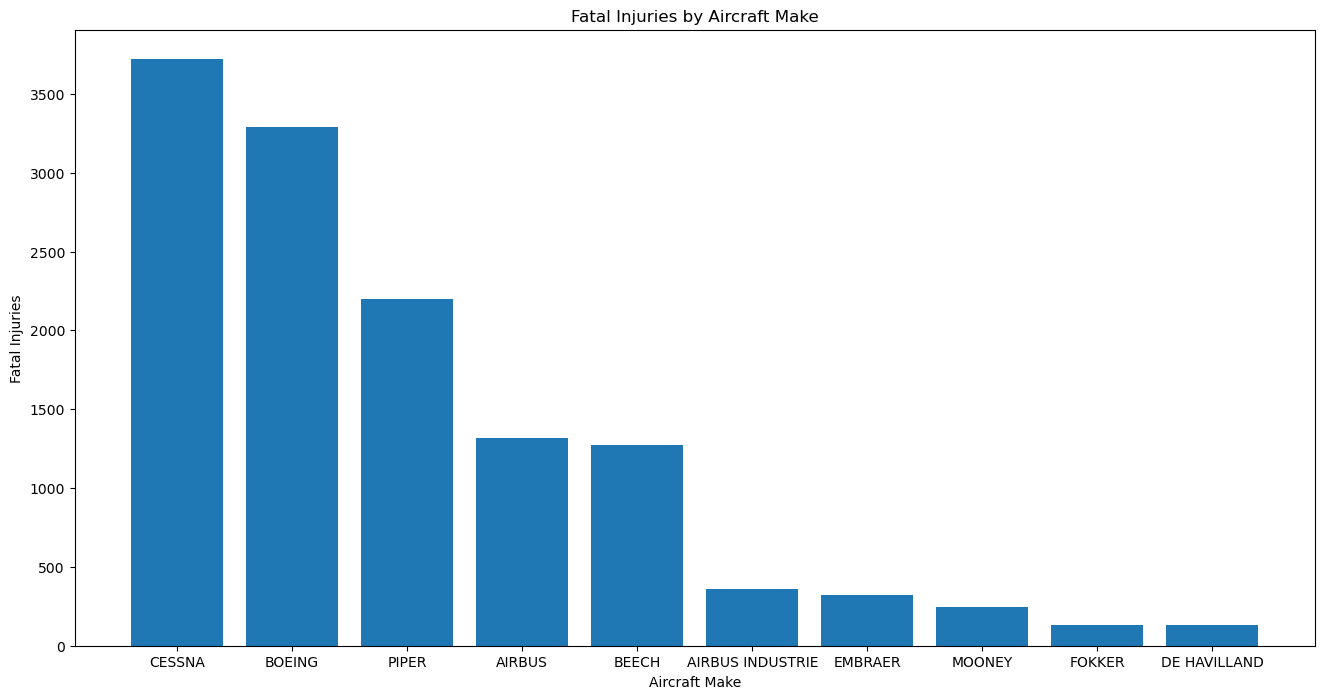

In [132]:
# plot a bar graph of fatal injuries by make of aircraft

# get the rows where accidents had fatal injuries
fatal_injuries = new_aviation_data[new_aviation_data['Total_Fatal_Injuries'] > 0]

# use groupby to select the injuries with the Make
fatal_injuries_by_make = fatal_injuries.groupby('Make')['Total_Fatal_Injuries'].sum().reset_index()

# sort in descending order
fatal_injuries_by_make.sort_values('Total_Fatal_Injuries', ascending=False, inplace=True)

# select the top 10

top_10_makes = fatal_injuries_by_make.head(10)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(top_10_makes['Make'], top_10_makes['Total_Fatal_Injuries'])
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Fatal Injuries')
ax.set_title('Fatal Injuries by Aircraft Make')

plt.show()




From the bar graph, Cessna aircrafts have suffered accidents with the highest number of fatal injuries. The Boeing whilst being an established manufacturer has had accidents resulting in a large number of fatal injuries. The Airbus is a prominent manufacturer of aircrafts and from the graph has not suffered as many fatal accidents in comparison to other popular manufacturers like Cessna and Boeing.

In [ ]:
# plot the fatal accidents by the number of engines in an aircraft
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(new_aviation_data['Number_of_Engines'], fatal_injuries)
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Fatal Injuries')
ax.set_title('Fatal Injuries by Aircraft Make')
